<a href="https://colab.research.google.com/github/samurai5634/COdes/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
!pip install quandl

In [19]:
import quandl

In [20]:
data = pd.read_csv("/content/d.csv")

In [21]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


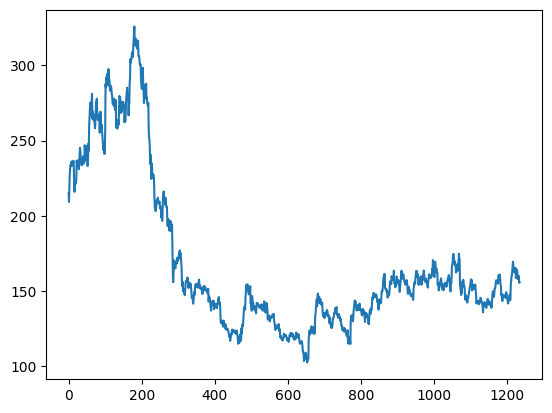

In [22]:
plt.plot(data['Close'], label ='closing values')
plt.show()

In [23]:
data['OC'] = (data['Close'] - data['Open'])
data['HL'] = (data['High'] - data['Low'])

In [24]:
data = data.dropna()

In [25]:
X = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [26]:
X


array([-1,  1,  1, ..., -1,  1, -1])

In [27]:
from sklearn.model_selection import train_test_split

# X here are the labels, and data are the features
X_train, X_test, Y_train, Y_test = train_test_split(data, X, test_size=0.25, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
para = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knn = neighbors.KNeighborsClassifier()
clf = GridSearchCV(knn, para, cv=5)

In [33]:
# Drop the 'Date' column from the training and testing features
X_train_numeric = X_train.drop('Date', axis=1)
X_test_numeric = X_test.drop('Date', axis=1)

clf.fit(X_train_numeric, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accur_train = accuracy_score(Y_train, clf.predict(X_train_numeric))
print(accur_train)

0.6565874730021598


In [36]:
accur_test = accuracy_score(Y_test, clf.predict(X_test_numeric))
print(accur_test)

0.5922330097087378


In [40]:
act = clf.predict(X_test_numeric)

In [41]:
actual_predicted = pd.DataFrame({'Actual': Y_test, 'Predict':act })

In [42]:
actual_predicted.head(10)

,Actual,Predict
0,-1,-1
1,-1,1
2,1,1
3,1,-1
4,-1,1
5,1,1
6,-1,-1
7,-1,-1
8,-1,-1
9,-1,-1
